# DBSCAN clusttering

### Importing libraries

In [58]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

### Making blobs
- The make_blobs() function can be used to generate blobs of points with a Gaussian distribution
- centers shows we have n center points
- centers: center point

In [60]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):

    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance(0-1)
    X = StandardScaler().fit_transform(X)
    return X, y

In [62]:
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)
print(X,'\n')
print(y)

[[-1.09237586  0.36105882]
 [-1.3891869   1.02436933]
 [ 1.62830847  0.60788502]
 ...
 [ 0.11218565 -1.31030674]
 [-0.93925233  1.23634872]
 [-1.31340677  0.97271781]] 

[2 2 0 ... 1 2 2]


### Making Model

In [71]:
epsilon = 0.3 #radius distance 
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 0, 1, ..., 2, 0, 0])

### detecting outliers

In [72]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask[:100]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [76]:
#set() method is used to convert any of the iterable to sequence of iterable elements with distinct elements

# xxx = np.array([1,1,5,1,5,3,3])
# set(xxx) #outcome: {1, 3, 5}

set(labels)

{-1, 0, 1, 2}

In [77]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [79]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

### Data visualization


In [81]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))


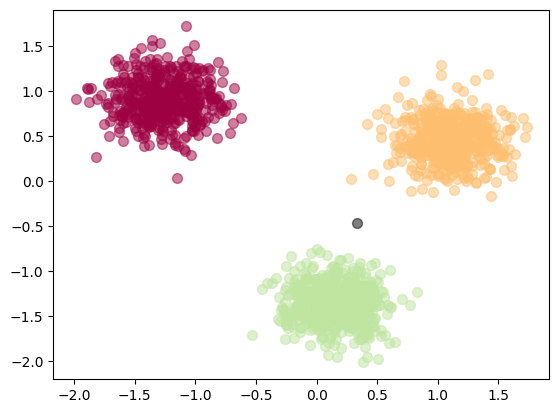

In [82]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)